In [67]:
# MD Samin Yeasar
# Roll: 1507099
# CSE, KUET

In [68]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [69]:
# functions
funding = ctrl.Antecedent(np.arange(0, 101, 1), 'funding' )
staffing = ctrl.Antecedent(np.arange(0, 101, 1), 'staffing' )
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk' )

In [70]:
funding[ 'inadequate' ] = fuzz.trapmf(funding.universe, [ 0,0, 20, 30])
funding[ 'marginal' ] = fuzz.trimf(funding.universe, [ 20, 50, 80])
funding[ 'adequate' ] = fuzz.trapmf(funding.universe, [ 60, 80, 100,100])

In [71]:
staffing[ 'small' ] = fuzz.trapmf(staffing.universe, [ 0, 0, 30, 60])
staffing[ 'large' ] = fuzz.trapmf(staffing.universe, [ 40, 60, 100, 100])

In [72]:
risk[ 'low' ] = fuzz.trapmf(risk.universe, [ 0,0,20, 40])
risk[ 'normal' ] = fuzz.trimf(risk.universe, [ 20, 50, 80])
risk[ 'high' ] = fuzz.trapmf(risk.universe, [ 60, 80, 100,100 ])

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


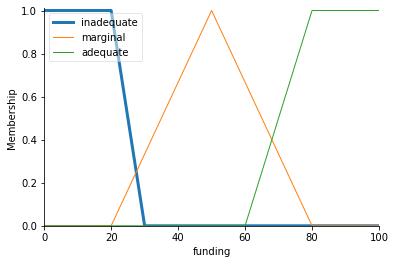

In [73]:
funding[ 'inadequate' ].view()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


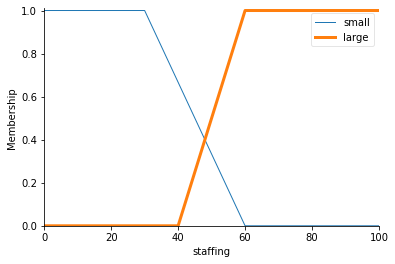

In [74]:
staffing['large'].view()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


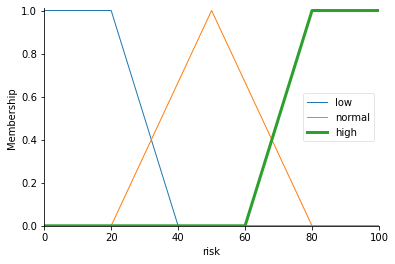

In [75]:
risk['high'].view()

In [76]:
rule1 = ctrl.Rule(funding[ 'adequate' ] | staffing[ 'small' ], risk[ 'low' ])
rule2 = ctrl.Rule(staffing[ 'large' ] & funding[ 'marginal' ], risk[ 'normal' ])
rule3 = ctrl.Rule(funding[ 'inadequate' ], risk[ 'high' ])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

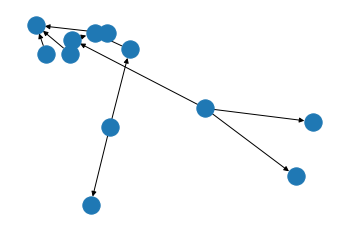

In [77]:
rule1.view()


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

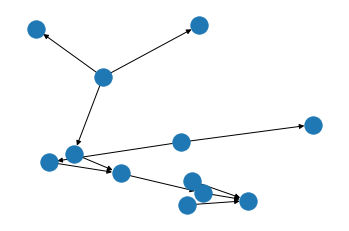

In [78]:
rule2.view()

In [79]:
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
final_risk = ctrl.ControlSystemSimulation(risk_ctrl)

In [80]:
final_risk.input[ 'staffing' ] = 60
final_risk.input[ 'funding' ] = 35

In [81]:
final_risk.compute()
print (final_risk.output[ 'risk' ])

50.00000000000001


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


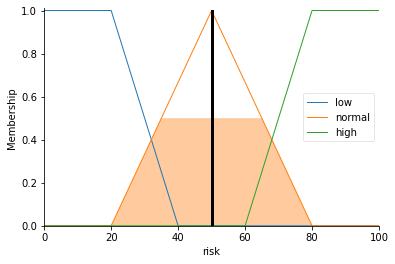

In [82]:
risk.view(sim=final_risk)